# Supervised Learning Project



## Goal: Create a model to predict whether or not a customer will churn.



## Part 1 - Imports and Read in the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 2 - Quick Data Check

**Confirm with info() method the datatypes and non-null values in the dataframe.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Get a statistical summary of the numeric columns with describe().**

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Part 3 - Exploratory Data Analysis

### General Feature Exploration

**Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Display the balance of the class labels (Churn) with a count plot.**

<AxesSubplot:xlabel='Churn', ylabel='count'>

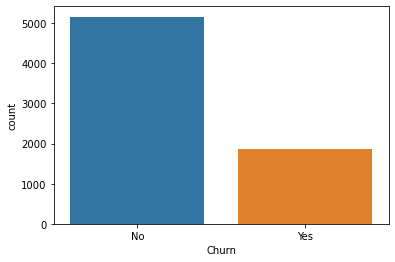

In [8]:
sns.countplot(data=df, x='Churn')

**Explore the distribution of TotalCharges between Churn categories with a box plot.**

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

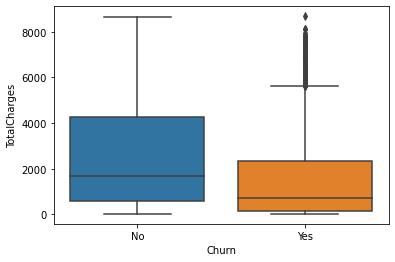

In [9]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')

**Create a box plot showing the distribution of TotalCharges per contract type with a hue coloring based on the churn class.**

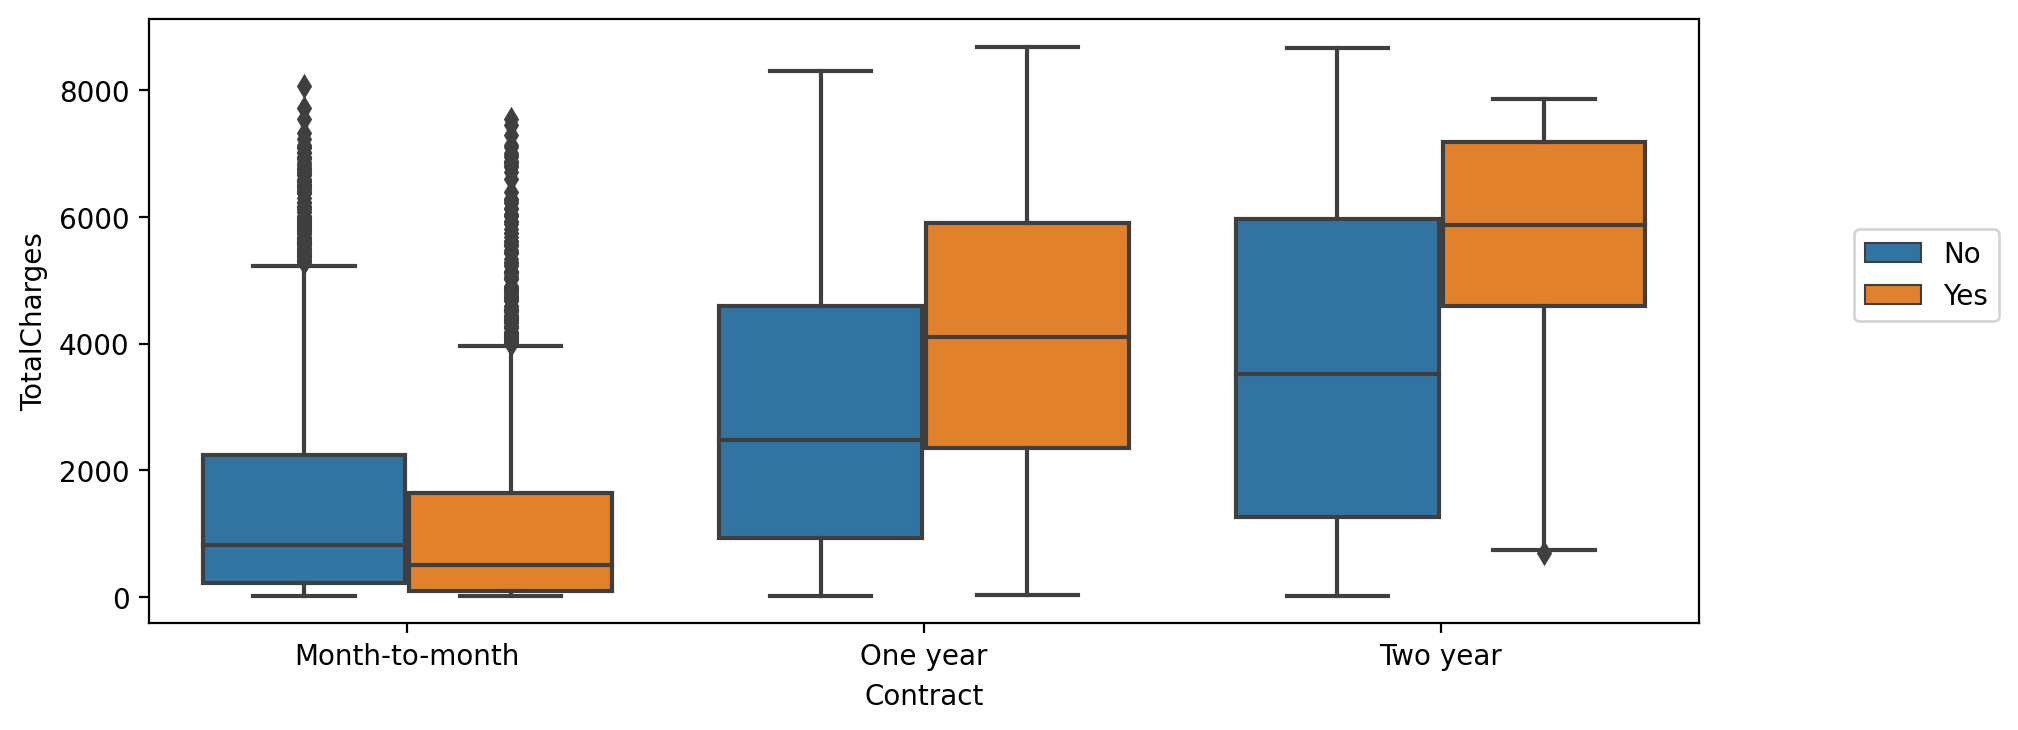

In [10]:
plt.figure(figsize=(10,4), dpi=200)
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')
plt.legend(loc=(1.1, 0.5))

**Create a bar plot showing the correlation of features to the class label. Convert categorical features into dummy variables**

Features for correlation: gender, SeniorCitizen, Partner, Dependants, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup,
DeviceProtection, TechSupport, InternetService, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod.

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [13]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

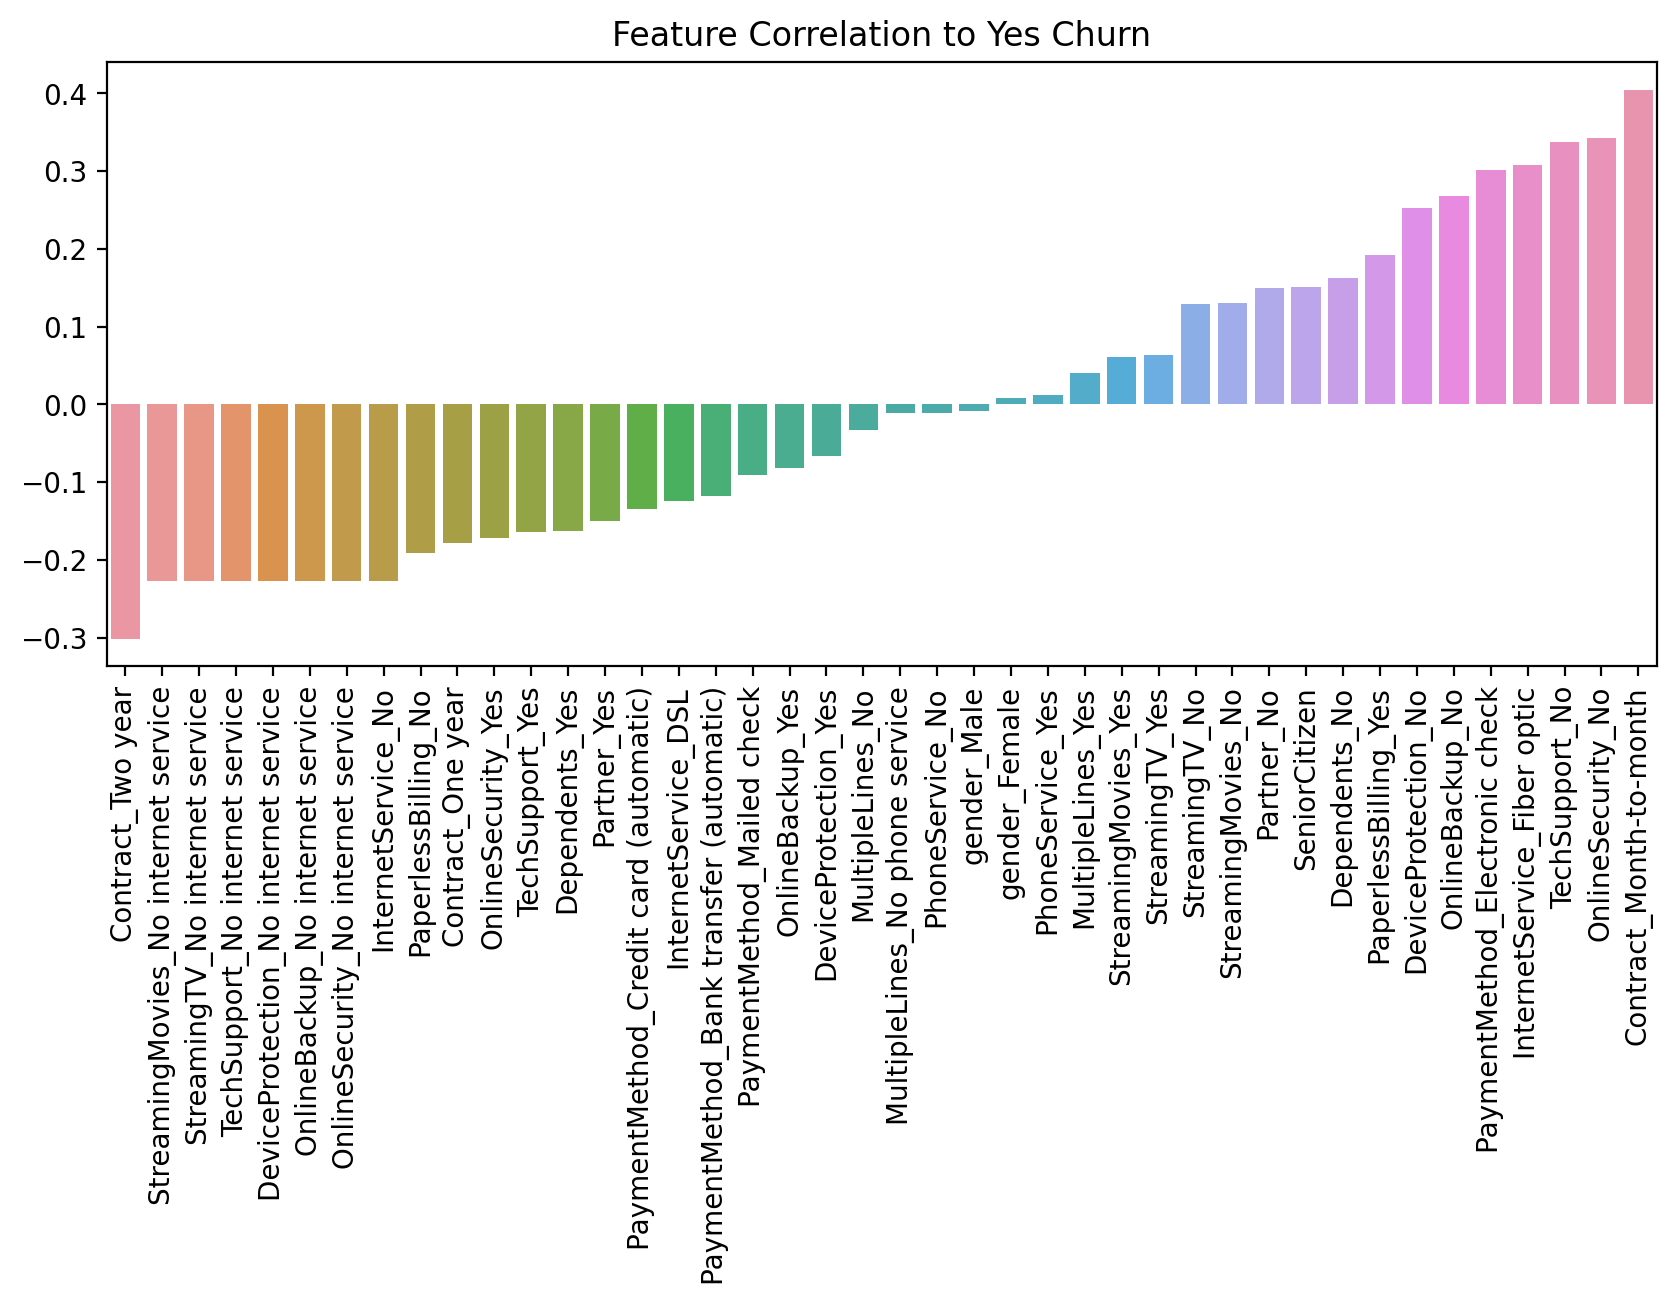

In [14]:
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index, y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title('Feature Correlation to Yes Churn')
plt.xticks(rotation=90);

## Part 4 - Churn Analysis

**What are the three contract types available?**

In [15]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Create a histogram displaying the distribution of tenure column.**

<AxesSubplot:xlabel='tenure', ylabel='Count'>

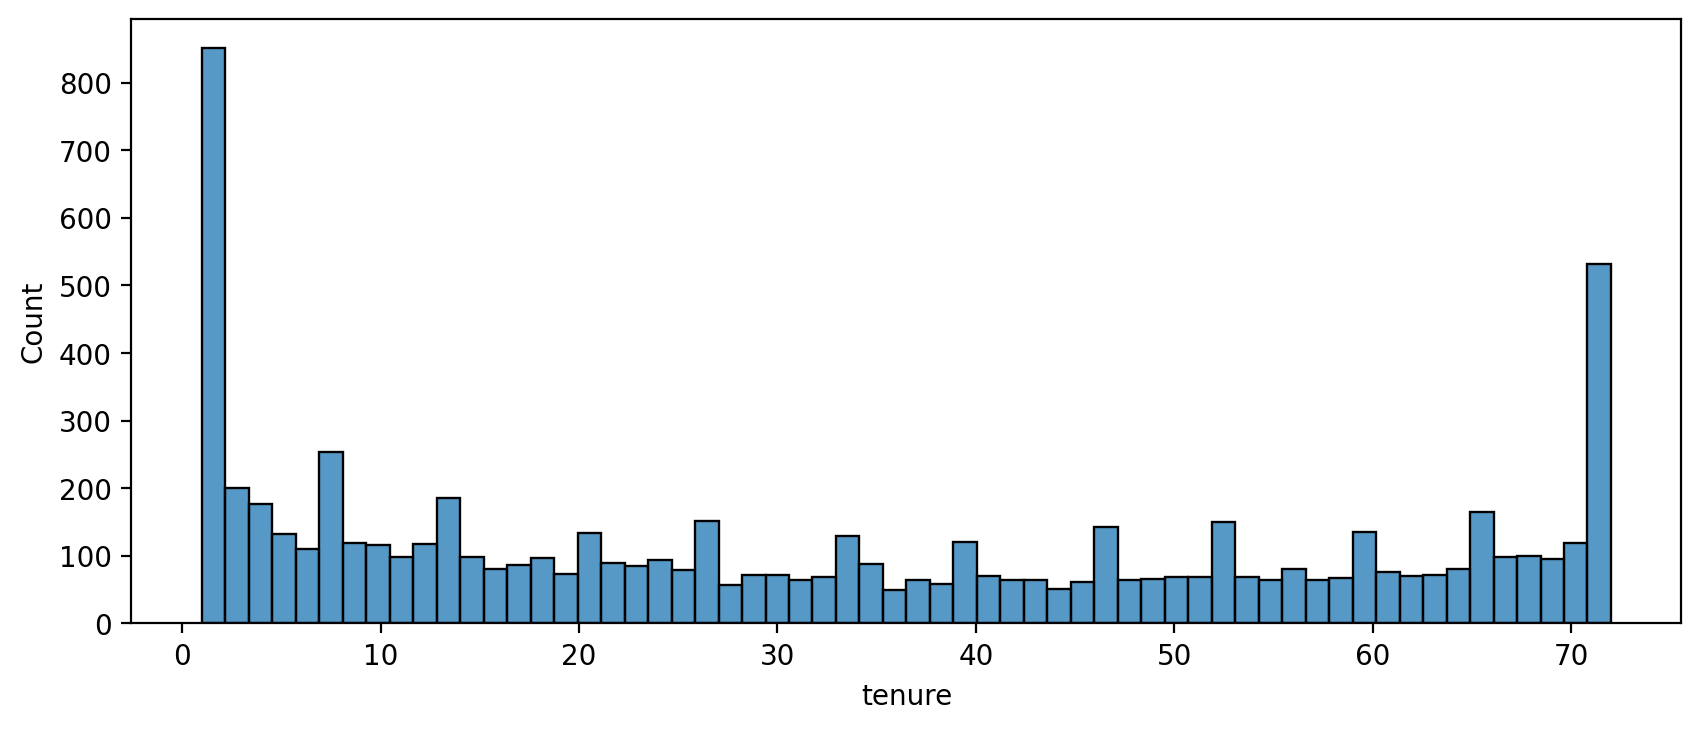

In [16]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=df, x='tenure', bins=60)

**Create a histogram separated by two additional features, Churn and Contract.**

<Figure size 2000x800 with 0 Axes>

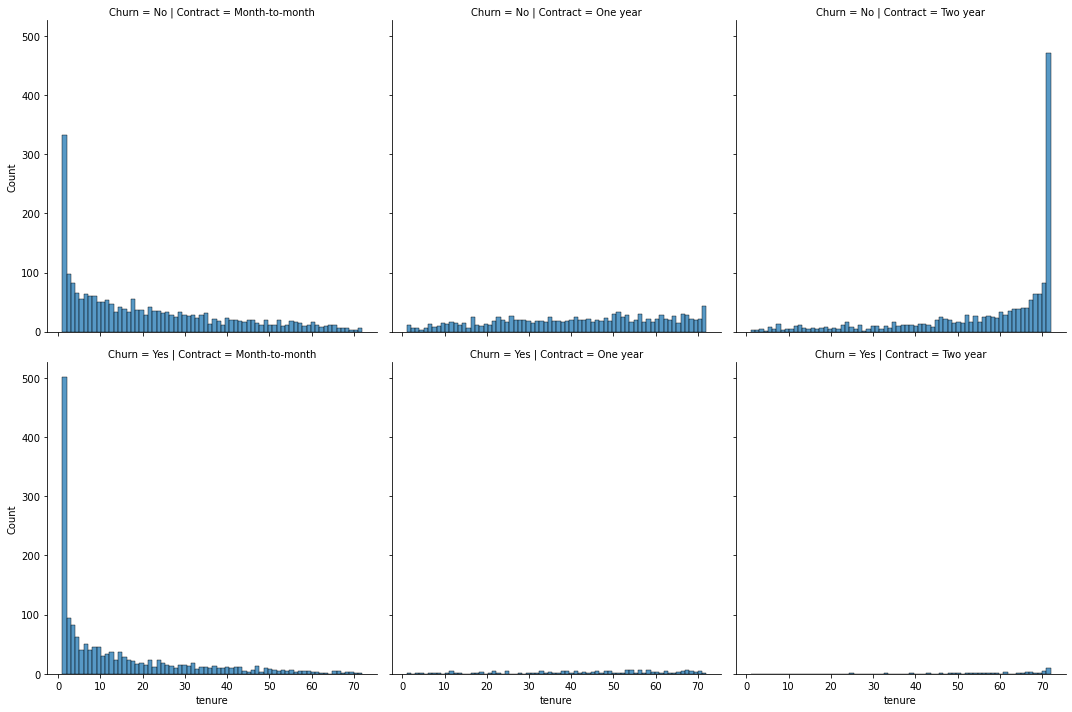

In [17]:
plt.figure(figsize=(10,4), dpi=200)
sns.displot(data=df, x='tenure', bins=70, col='Contract', row='Churn')

**Display a scatter plot of TotalCharges versus MonthlyCharges and color hue by Churn.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

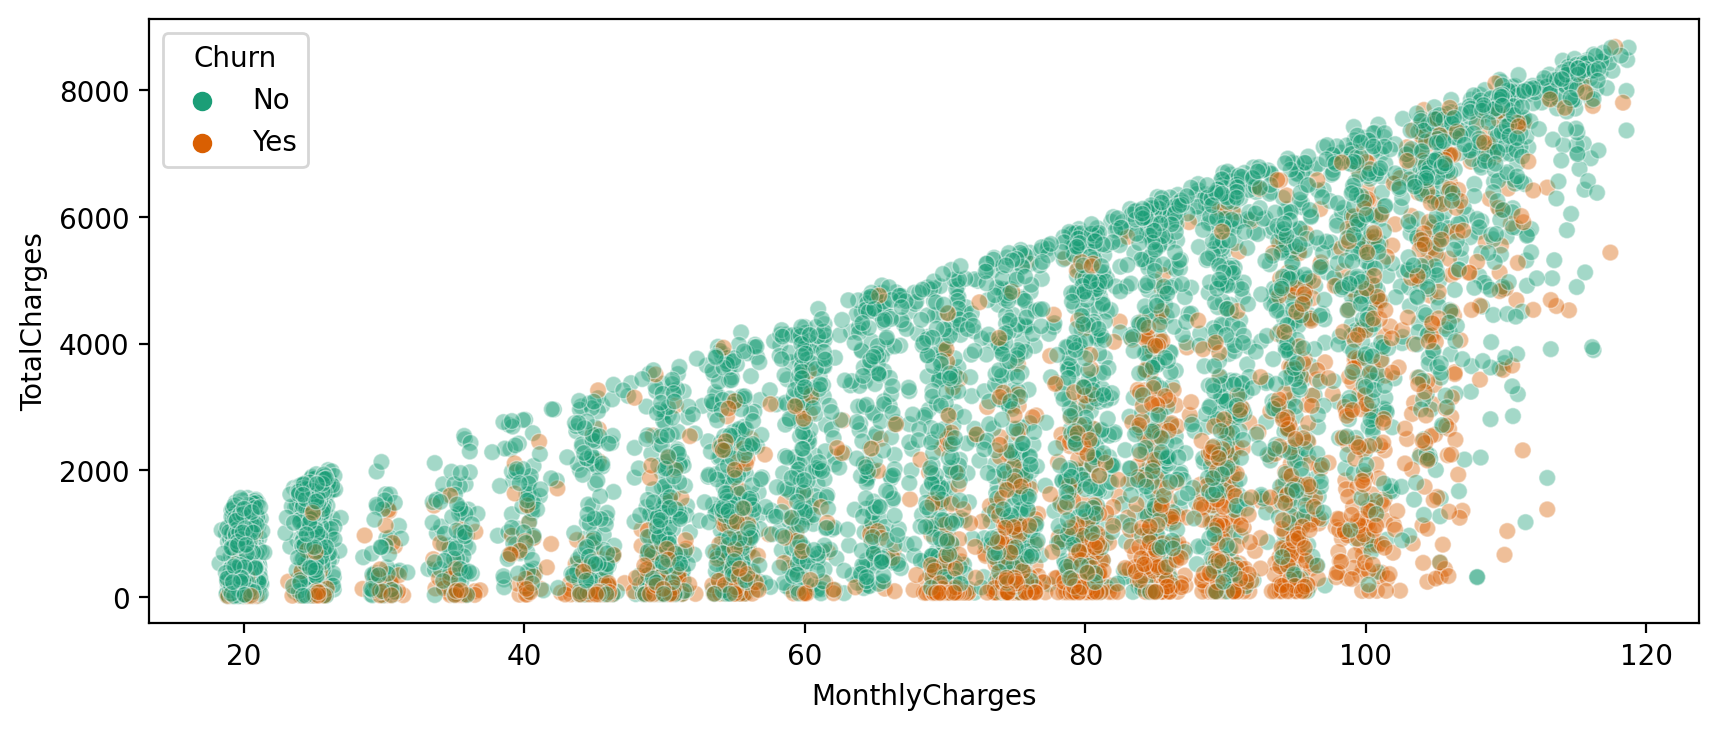

In [18]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.4, linewidth=0.5, palette='Dark2')

**Create Cohorts Based on Tenure.**

**Treating each unique tenure grouop as a cohort calculate the churn rate (percentage that had Yes Churn) per cohort.**

In [19]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [20]:
churn_rate = 100 * yes_churn / (no_churn + yes_churn)

In [21]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**Create a plot showing churn rate per months of tenure.**

Text(0, 0.5, 'Churn Percentage')

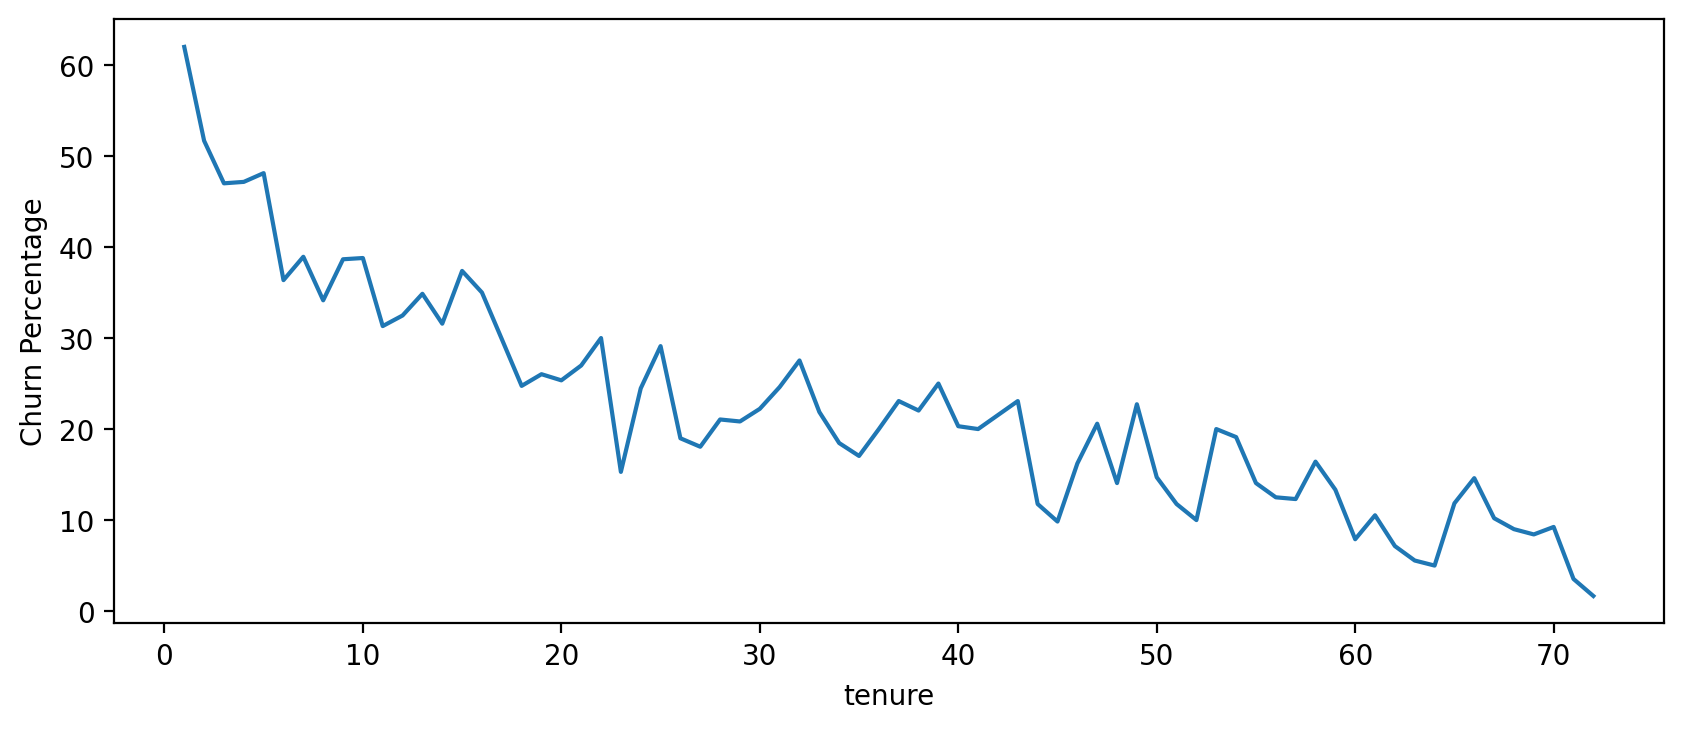

In [22]:
plt.figure(figsize=(10,4), dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage')

**Broader Cohort Groups.**

**Based on the tenure column values create a new column called Tenure Cohort that creates 4 separate categories: 0-12 Months, 12-24 Months, 24-48 Months, Over 48 Months.**

In [23]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [24]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [25]:
df.head(10)[['tenure', 'Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**Create a scatterplot of TotalCharges versus MonthlyCharges colored by Tenure Cohort.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

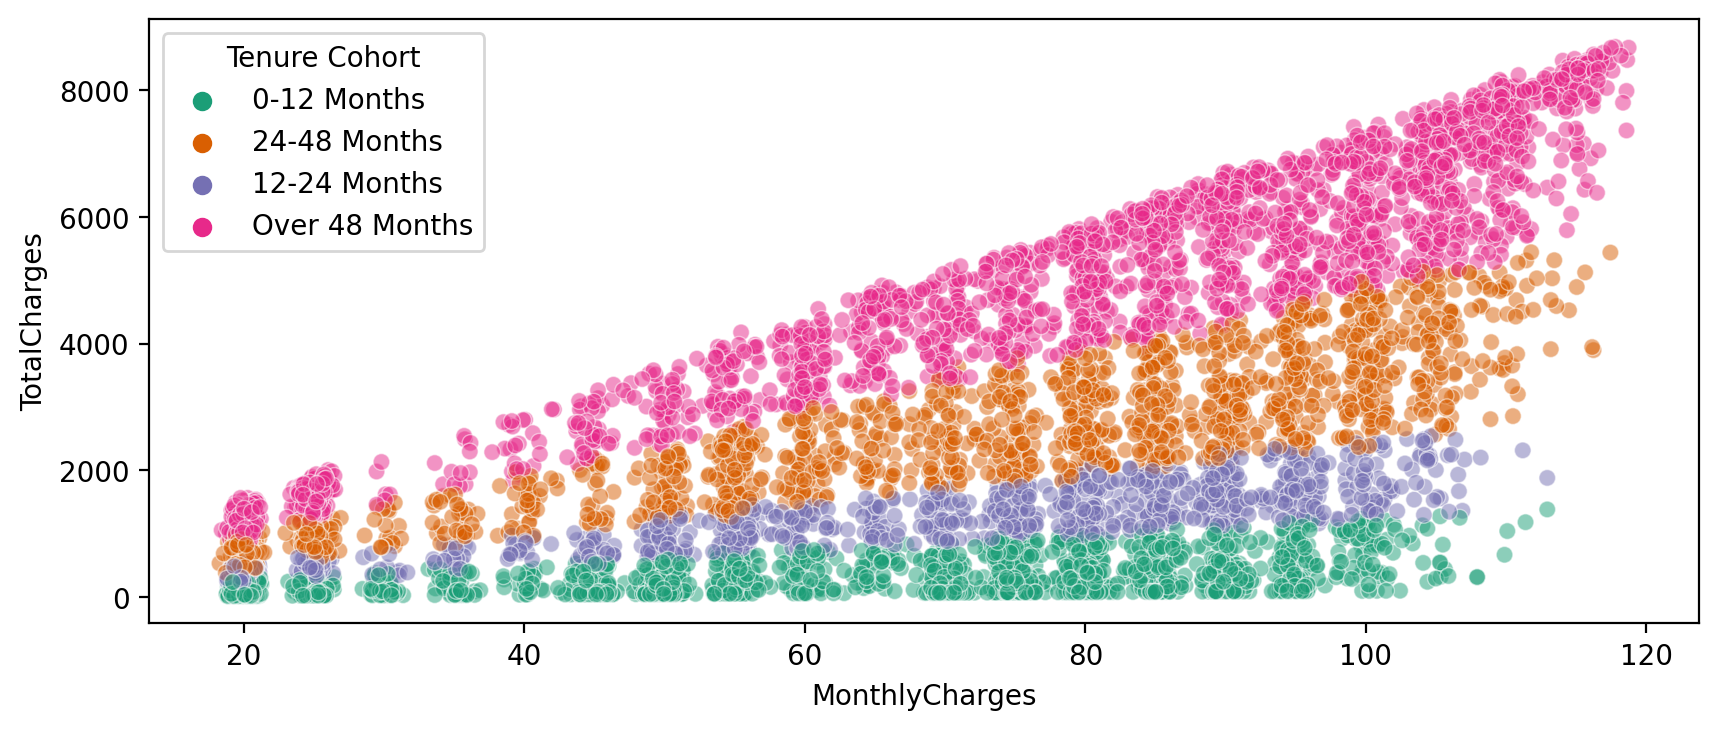

In [26]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', alpha=0.5, linewidth=0.5, palette='Dark2')

**Create a countplot showing the churn count per cohort.**

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

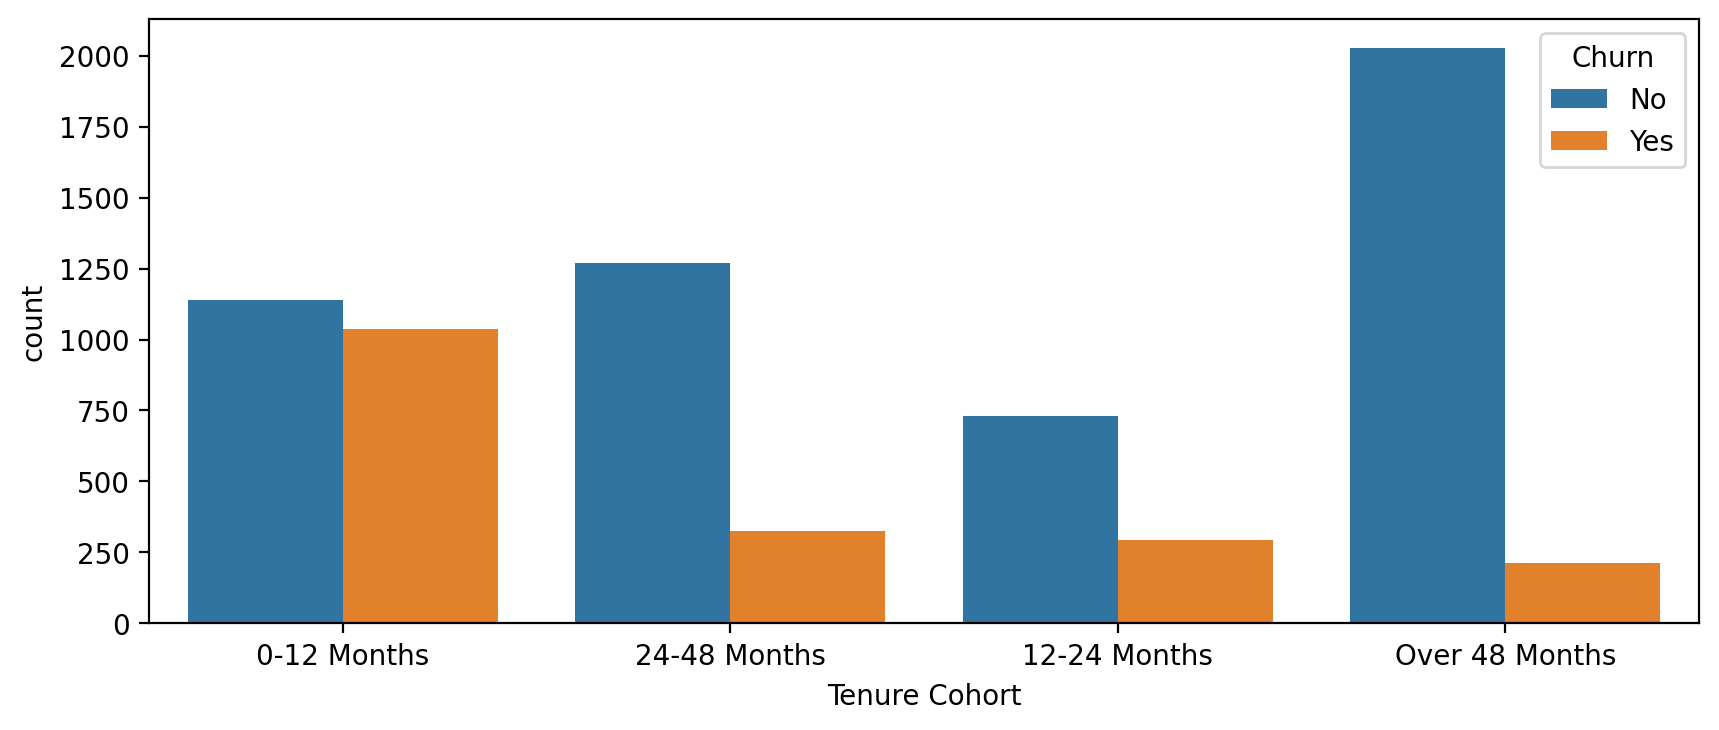

In [27]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

**Create a grid of count plots showing counts per Tenure Cohort separated out by ContractType and colored by the Churn hue.**

<Figure size 2000x800 with 0 Axes>

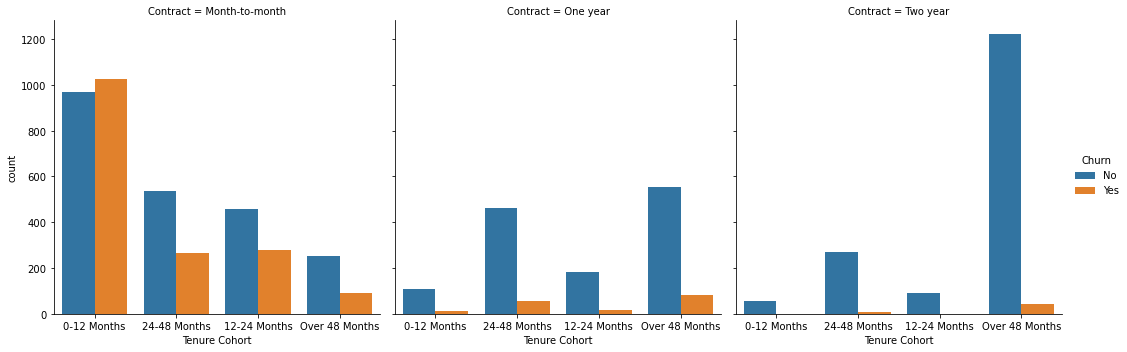

In [28]:
plt.figure(figsize=(10,4), dpi=200)
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', col='Contract', kind='count')

## Part 5 - Predictive Modeling

### Single Decision Tree

**Separate out the data into X features and Y label. Create dummy variables when necessary and note which features are not useful and should be dropped.**

In [29]:
X = df.drop(['Churn', 'customerID'], axis=1)
X = pd.get_dummies(X, drop_first=True)

In [30]:
y = df['Churn']

**Perform a train test split holding out 10% of the data for testing.**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Train a single decision tree model.**

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt = DecisionTreeClassifier(max_depth=6)

In [35]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

**Evaluate performance metrics from decision tree including classification report and plotting a confusion matrix.**

In [37]:
preds = dt.predict(X_test)

In [129]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [130]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.50      0.44      0.47       147

    accuracy                           0.79       704
   macro avg       0.68      0.66      0.67       704
weighted avg       0.78      0.79      0.79       704



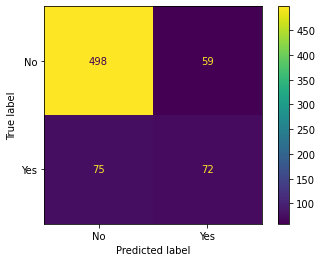

In [134]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

**Calculate feature importance from the decision tree.**

In [76]:
imp_feats = pd.DataFrame(data=dt.feature_importances_, index=X.columns, columns=['Feature Importance']).sort_values('Feature Importance')

Text(0.5, 1.0, 'Feature Importnce for Decision Tree')

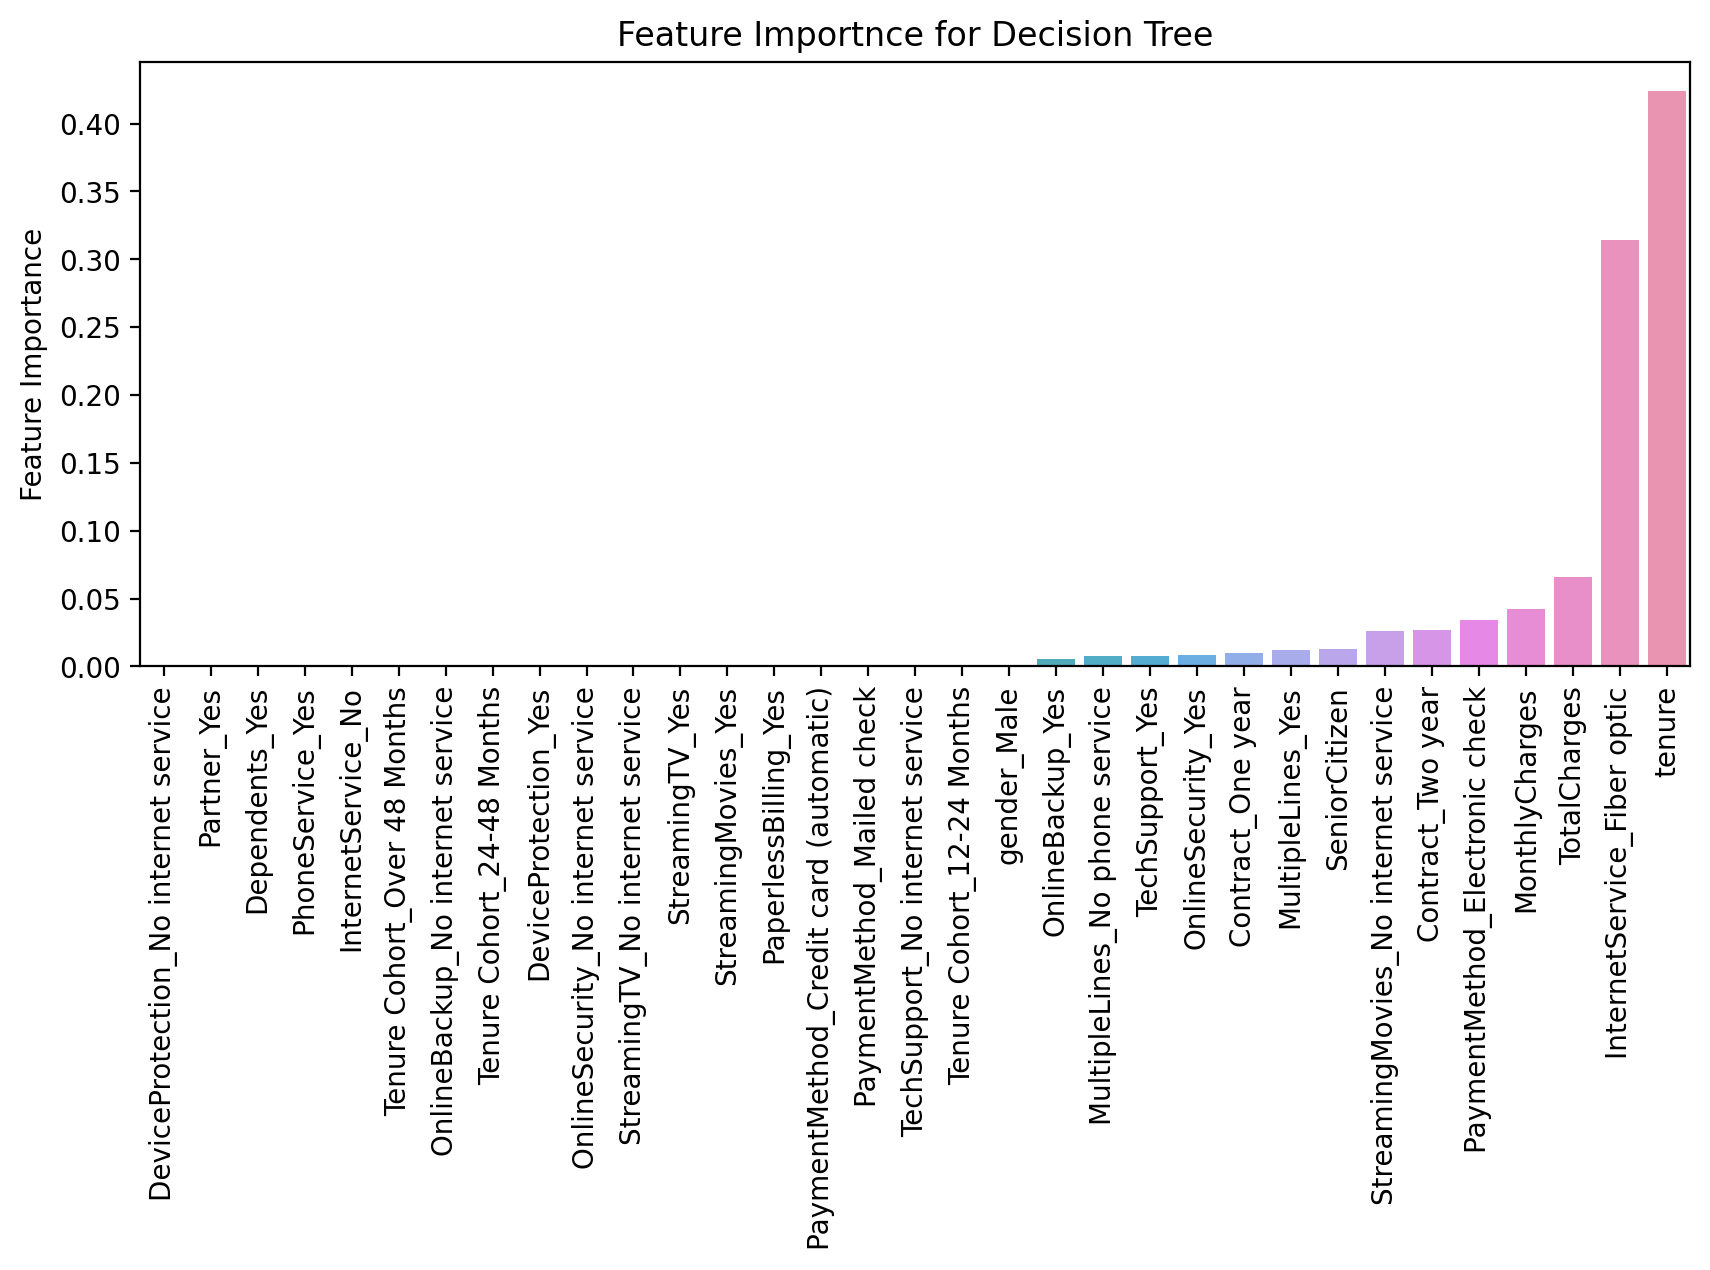

In [78]:
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'), x=imp_feats.sort_values('Feature Importance').index, y='Feature Importance')
plt.xticks(rotation=90)
plt.title('Feature Importnce for Decision Tree')

**Plot the Decision Tree.**

In [81]:
from sklearn.tree import plot_tree

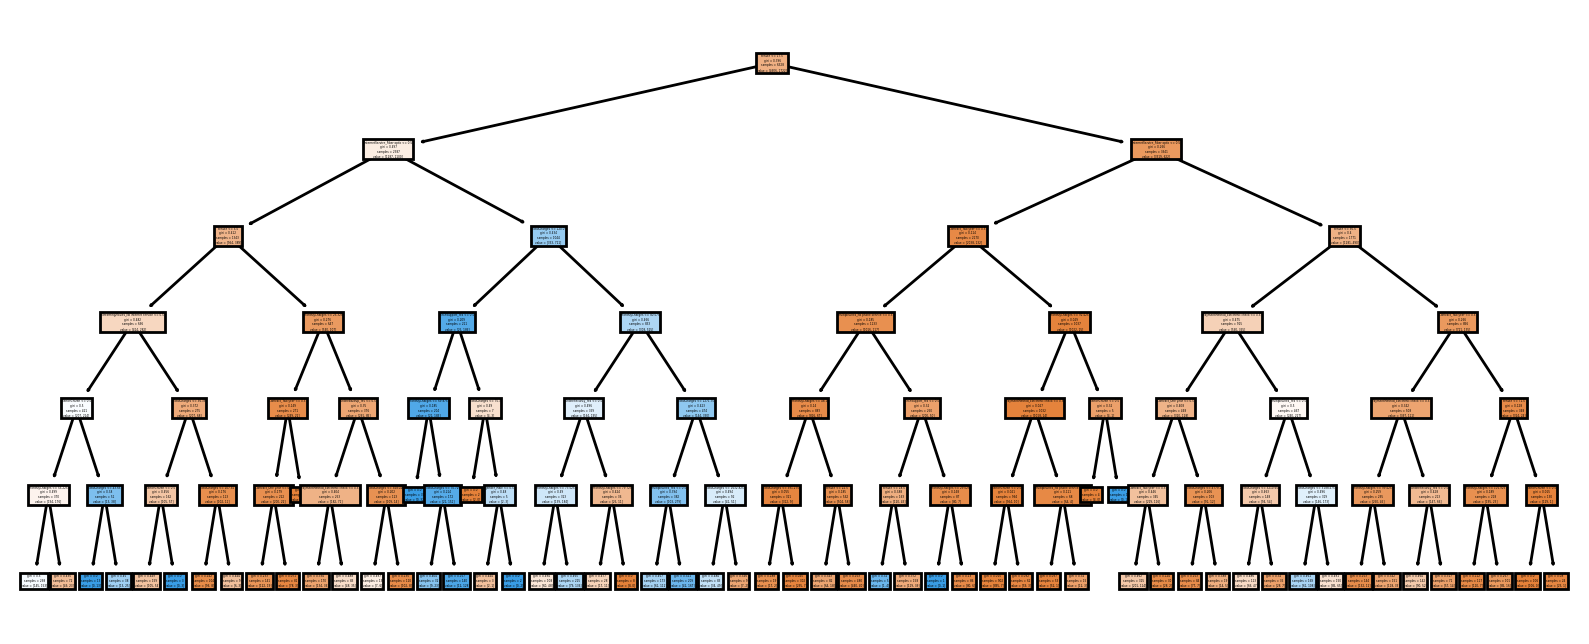

In [85]:
plt.figure(figsize=(10,4), dpi=200)
plot_tree(dt, filled=True, feature_names=X.columns);

## Random Forest

**Create a random forest model, create classification report and confusion matrix from its predicted results on the test set.**

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
rf = RandomForestClassifier(n_estimators=100)

In [138]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [139]:
preds = rf.predict(X_test)

In [140]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.45      0.47       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.67       704
weighted avg       0.78      0.79      0.79       704



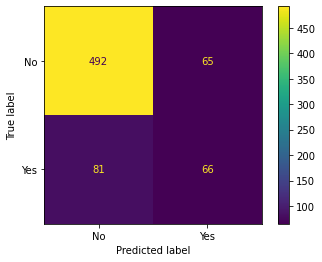

In [141]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

**Use AdaBoost to create a model and report back the classification report and the plot of the confusion matrix for its predicted results.**

In [142]:
from sklearn.ensemble import AdaBoostClassifier

In [143]:
ada_model = AdaBoostClassifier()

In [144]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier()

In [145]:
preds = ada_model.predict(X_test)

In [146]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



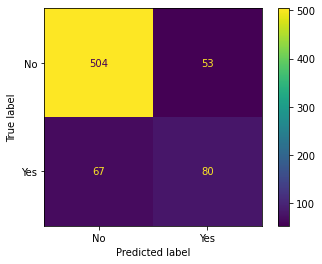

In [147]:
ConfusionMatrixDisplay.from_estimator(ada_model, X_test, y_test)

## Conclusion: AdaBoost model performed best.